In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
#sns.set_context("paper", font_scale = 2)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.rcParams['font.family'] = "tw cent condensed"
%matplotlib inline

In [2]:
train = pd.read_csv('c:/Users/joe/desktop/train_2016_v2.csv',parse_dates=['transactiondate'])

# load the properties data
prp = pd.read_csv('c:/Users/joe/desktop/properties_2016.csv')

merged = pd.merge(train,prp,on='parcelid',how='left')

C:\Users\Joe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#fig,ax = plt.subplots()
high = np.percentile(np.log(merged['taxvaluedollarcnt'].dropna()),99)
low = np.percentile(np.log(merged['taxvaluedollarcnt'].dropna()),1)
mor = merged[(np.log(merged['taxvaluedollarcnt']) > low) & (np.log(merged['taxvaluedollarcnt']) < high)]
#plt.hist(np.log(mor['taxvaluedollarcnt']),bins='auto')
#plt.xticks( mor['taxvaluedollarcnt'],rotation=70)

In [4]:
plt.style.use('classic')
fig,ax = plt.subplots()
high = np.percentile(merged['taxvaluedollarcnt'].dropna(),99)
low = np.percentile(merged['taxvaluedollarcnt'].dropna(),1)
mor = merged[(merged['taxvaluedollarcnt'] > low) & (merged['taxvaluedollarcnt'] < high)]
plt.hist((mor['taxvaluedollarcnt']),bins=20, color='darkseagreen')
plt.title('Home Value Distribution')
plt.ylabel('Frequency')
plt.xlabel('Home Value')
plt.xticks(rotation = 70)
plt.text(900000,18000,'Average Home Value = $424,999.82', fontsize=14)
plt.text(1000000,16000,'88,468 Homes Total')
plt.text(1000000,15000,'1,806 Outliers Removed:')
plt.text(1100000,14000,'903 from bottom 1%')
plt.text(1300000,13000,'Lower Cutoff = $36,878')
plt.text(1100000,12000,'903 from upper 99%')
plt.text(1300000,11000,'Upper Cutoff = $2,478,460')

In [5]:
plt.style.use('classic')
fig,ax = plt.subplots()
high = np.percentile(merged['taxvaluedollarcnt'].dropna(),99)
low = np.percentile(merged['taxvaluedollarcnt'].dropna(),1)
mor = merged[(merged['taxvaluedollarcnt'] > low) & (merged['taxvaluedollarcnt'] < high)]
plt.hist(np.log(mor['taxvaluedollarcnt']),bins=20, color='darkseagreen')
plt.title('Home Value Distribution (Log Transform)')
plt.ylabel('Frequency')
plt.xlabel('Log(Home Value)')
plt.xticks(rotation = 70)

(array([10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <a list of 10 Text xticklabel objects>)

In [6]:
toptencor = mor[mor.columns[0:]].corr()['taxvaluedollarcnt'].sort_values(ascending=False).head(11)
toptencor = toptencor[1:].sort_values(ascending=False).reset_index()

In [16]:
plt.style.use('dark_background')
sns.barplot(x=toptencor['taxvaluedollarcnt'],y=toptencor['index'],palette='GnBu_d')
plt.title('Top Ten Features Correlated to Home Value')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('')
plt.yticks(fontsize=15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

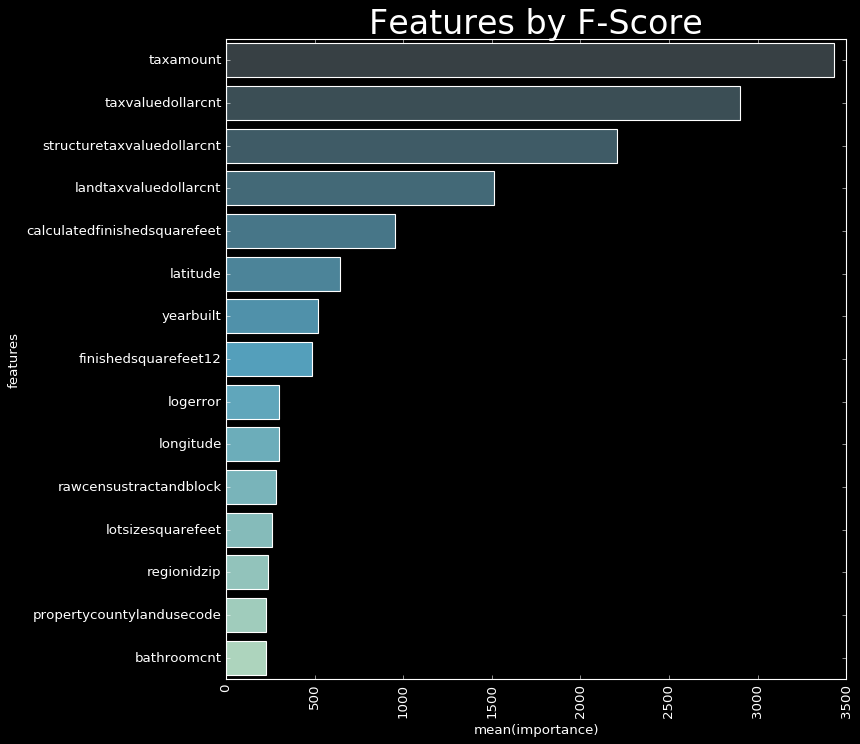

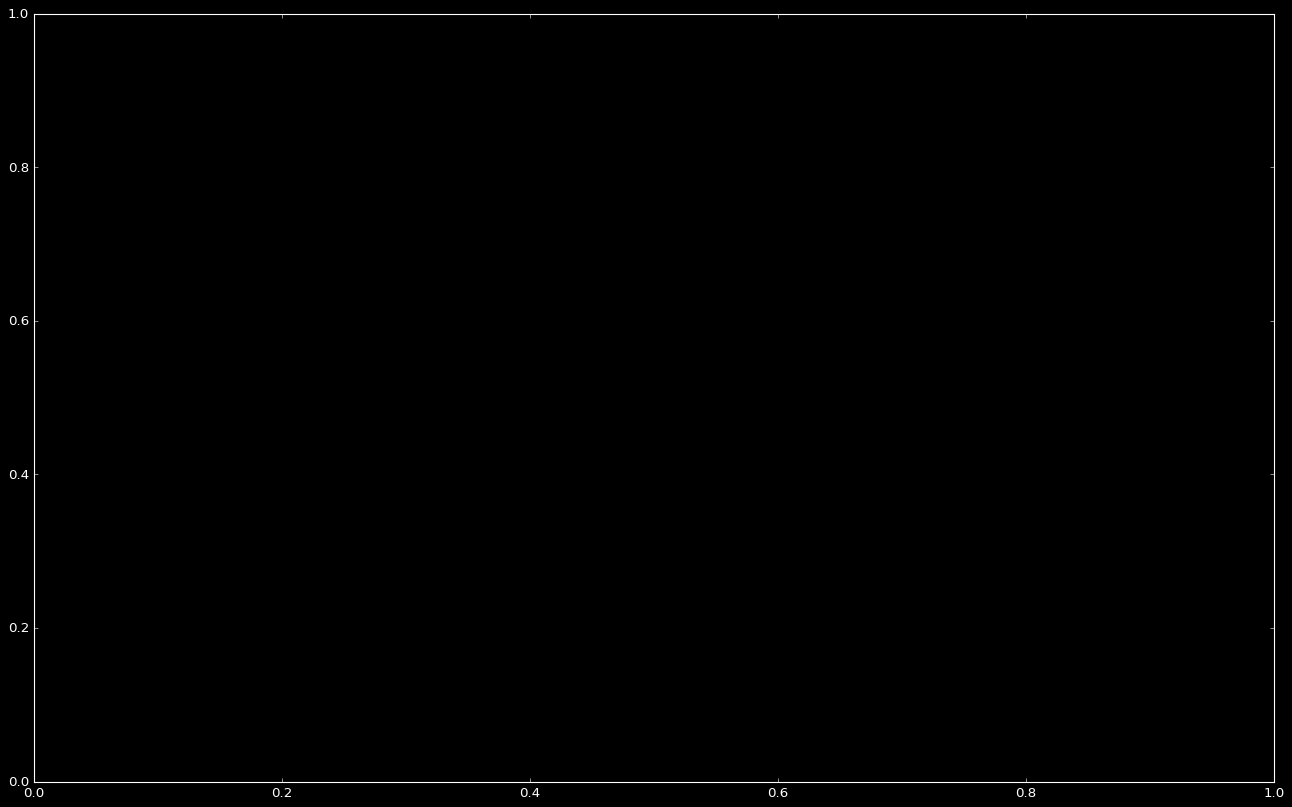

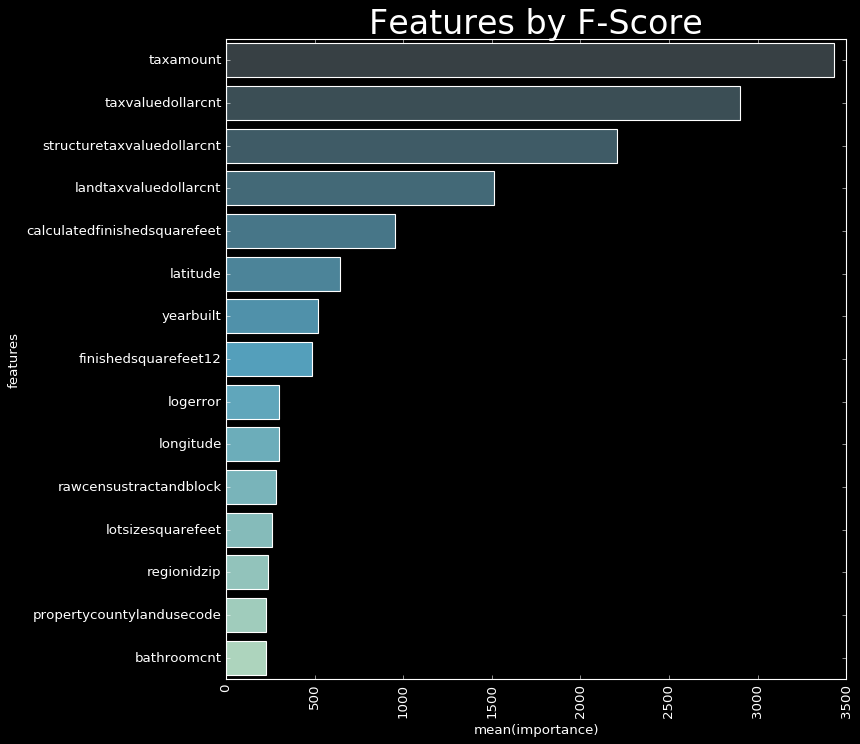

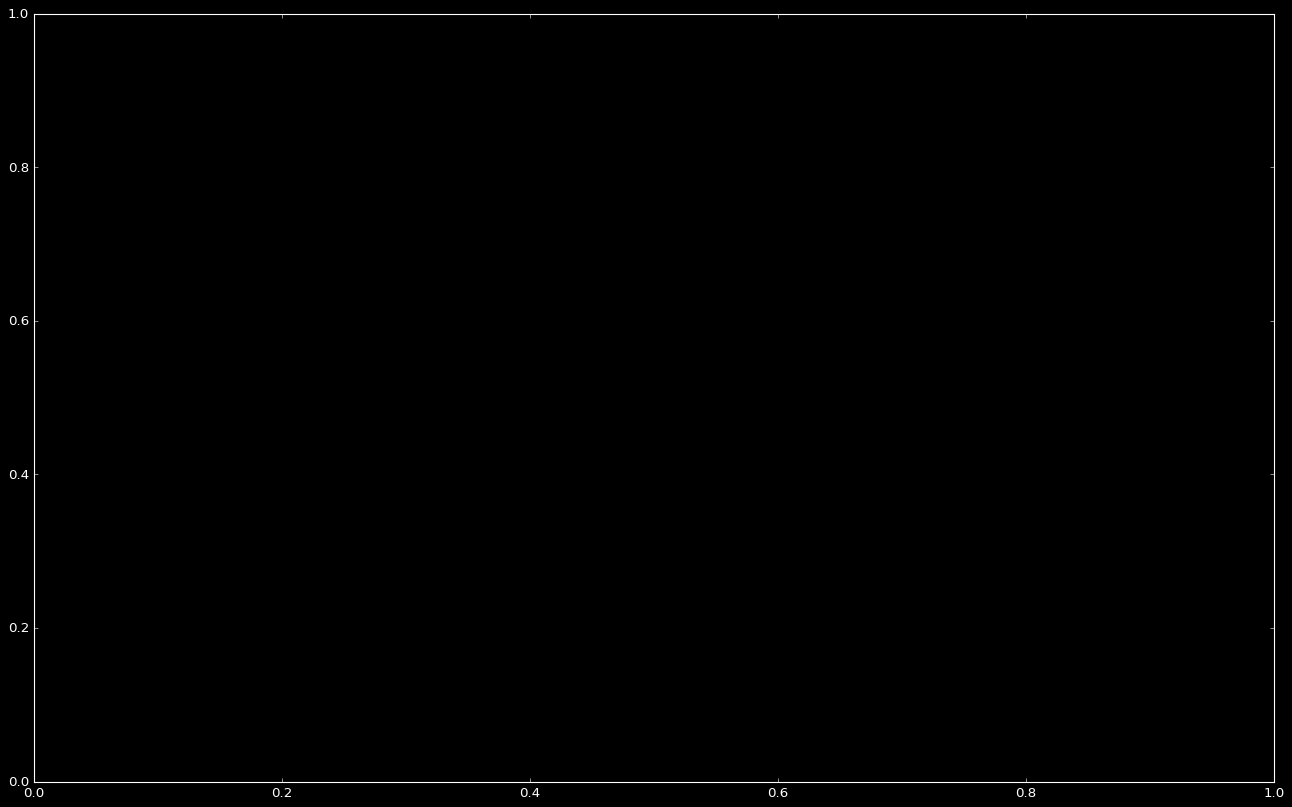

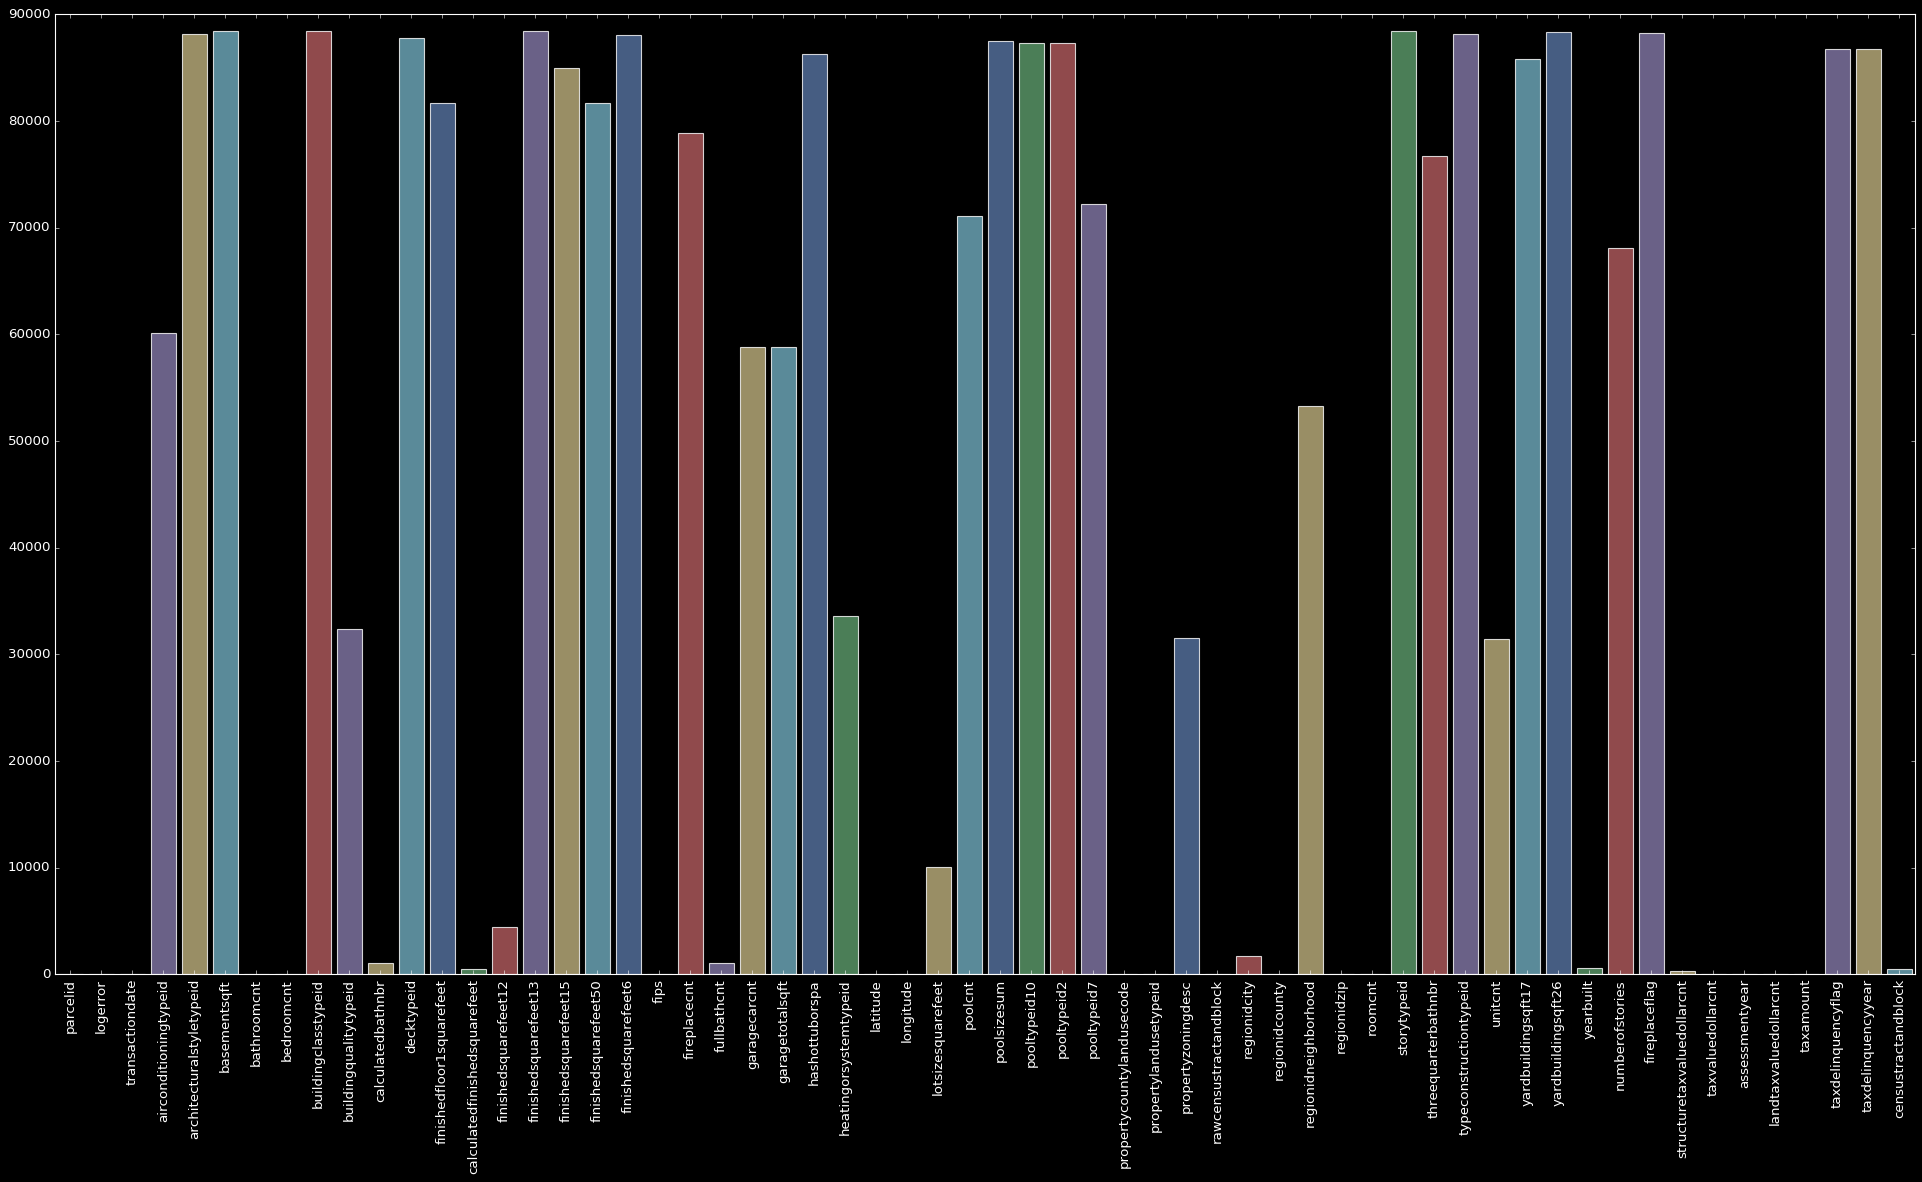

In [13]:
plt.figure(figsize=(30,15))
sns.barplot(mor.isnull().sum().index,mor.isnull().sum().values,alpha=0.8, palette='deep')
plt.xticks(rotation = 'vertical')
plt.show()

In [10]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

morFiltered = mor.fillna(-999)
for f in morFiltered.columns:
    if morFiltered[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(morFiltered[f].values)) 
        morFiltered[f] = lbl.transform(list(morFiltered[f].values))
        
train_y = morFiltered.taxvaluedollarcnt.values
train_X = morFiltered.drop(["parcelid", "transactiondate"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[11:26:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=8
[11:26:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=8
[11:26:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=8
[11:26:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[11:26:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=8
[11:26:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=8
[11:26:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[11:26:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[11:26:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[11:26:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[11:26:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[11:26:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[11:26:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[11:26:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

In [21]:
print(model)

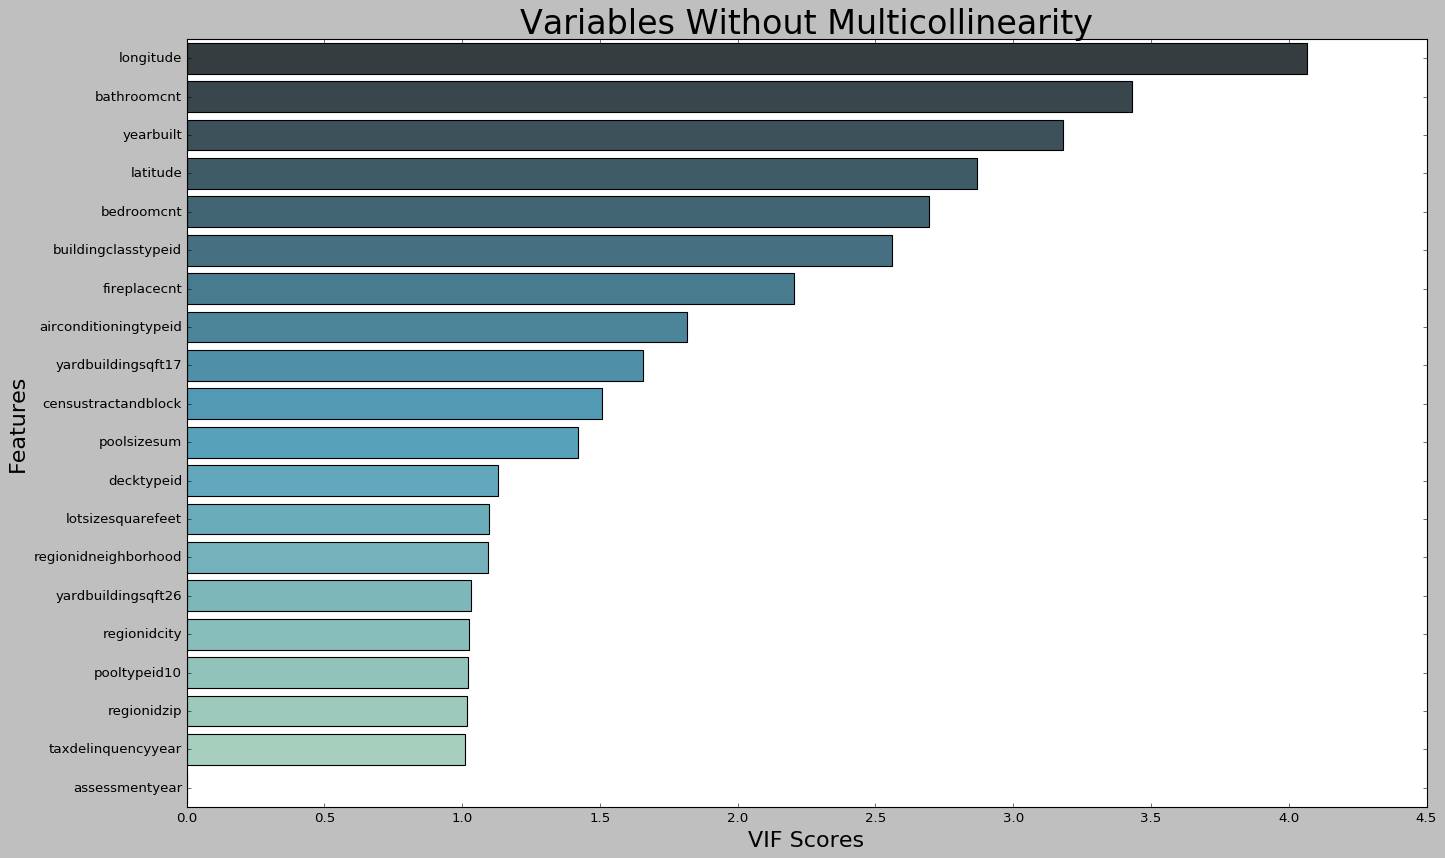

In [24]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
#fig,ax= plt.subplots()
#fig.set_size_inches(10,10)
#plt.xticks(rotation=90)
#ax.set_title('Features by F-Score',fontsize=30)
#sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",palette='GnBu_d')
#%%
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in mor.columns:
    #print (f)
    if mor[f].dtype!='object' and f not in ["parcelid", "transactiondate", "logerror"]:
        numericalCol.append(f)
morFilterd = mor[numericalCol].fillna(-999)
vifDict = calculate_vif_(morFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

plt.style.use('classic')
fig,ax1 = plt.subplots()
fig.set_size_inches(20,12)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",palette="GnBu_d")
#sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#f5853f")
#ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax1.set_xlabel('VIF Scores',fontsize=20)
ax1.set_ylabel('Features',fontsize=20)
ax1.set_title("Variables Without Multicollinearity",fontsize=30)
#ax2.set_xlabel('VIF Scores',fontsize=20)
#ax2.set_ylabel('Features',fontsize=20)
#ax2.set_title("Variables With Multicollinearity",fontsize=30)

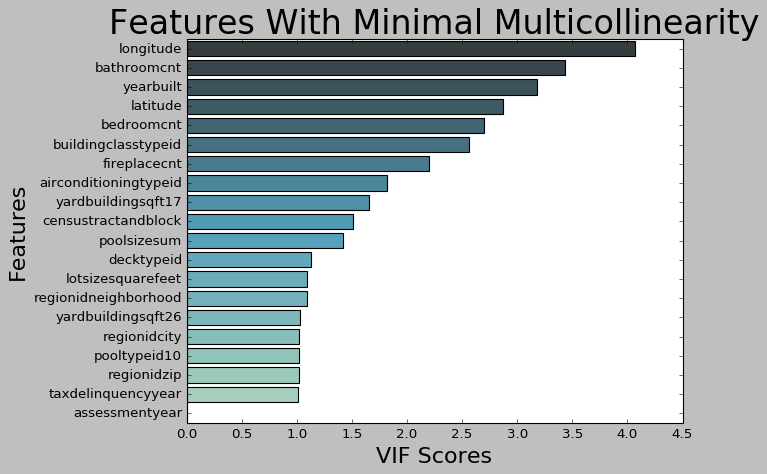

In [25]:
fig,(ax1) = plt.subplots()
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",palette="GnBu_d")
#sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#f5853f")
#ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax1.set_xlabel('VIF Scores',fontsize=20)
ax1.set_ylabel('Features',fontsize=20)
ax1.set_title("Features With Minimal Multicollinearity",fontsize=30)

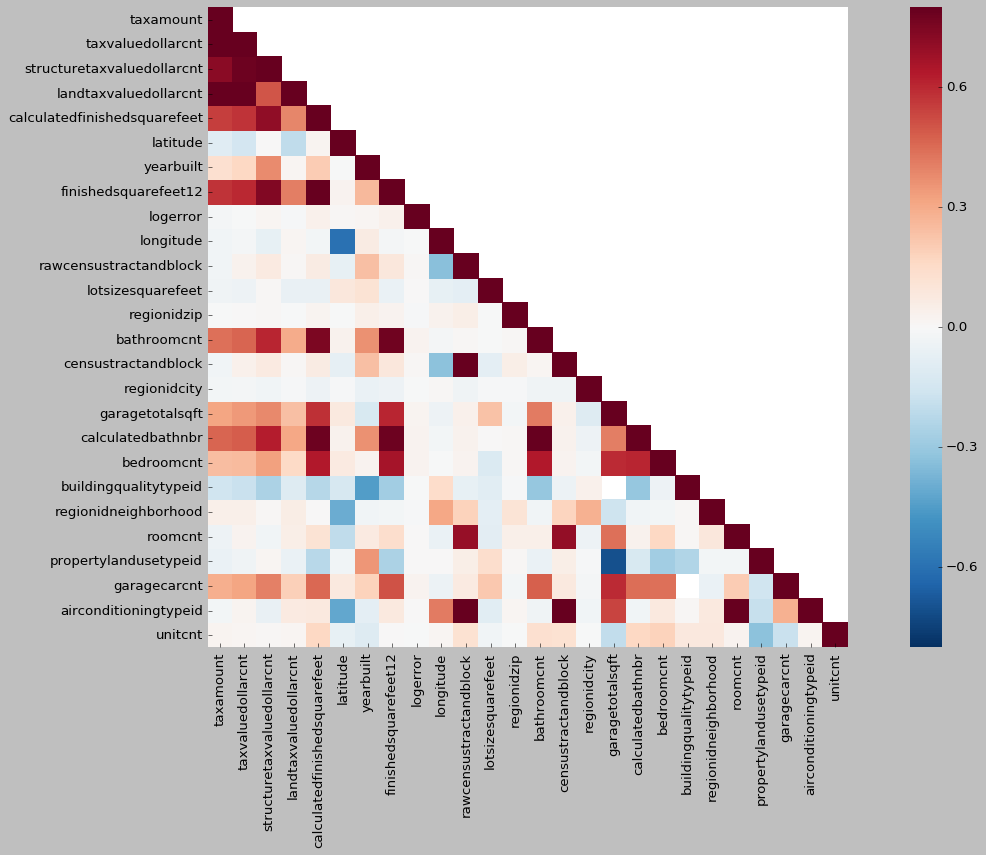

In [26]:
plt.style.use('classic')
topFeatures = features["features"].tolist()[:28]
corrMatt = mor[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

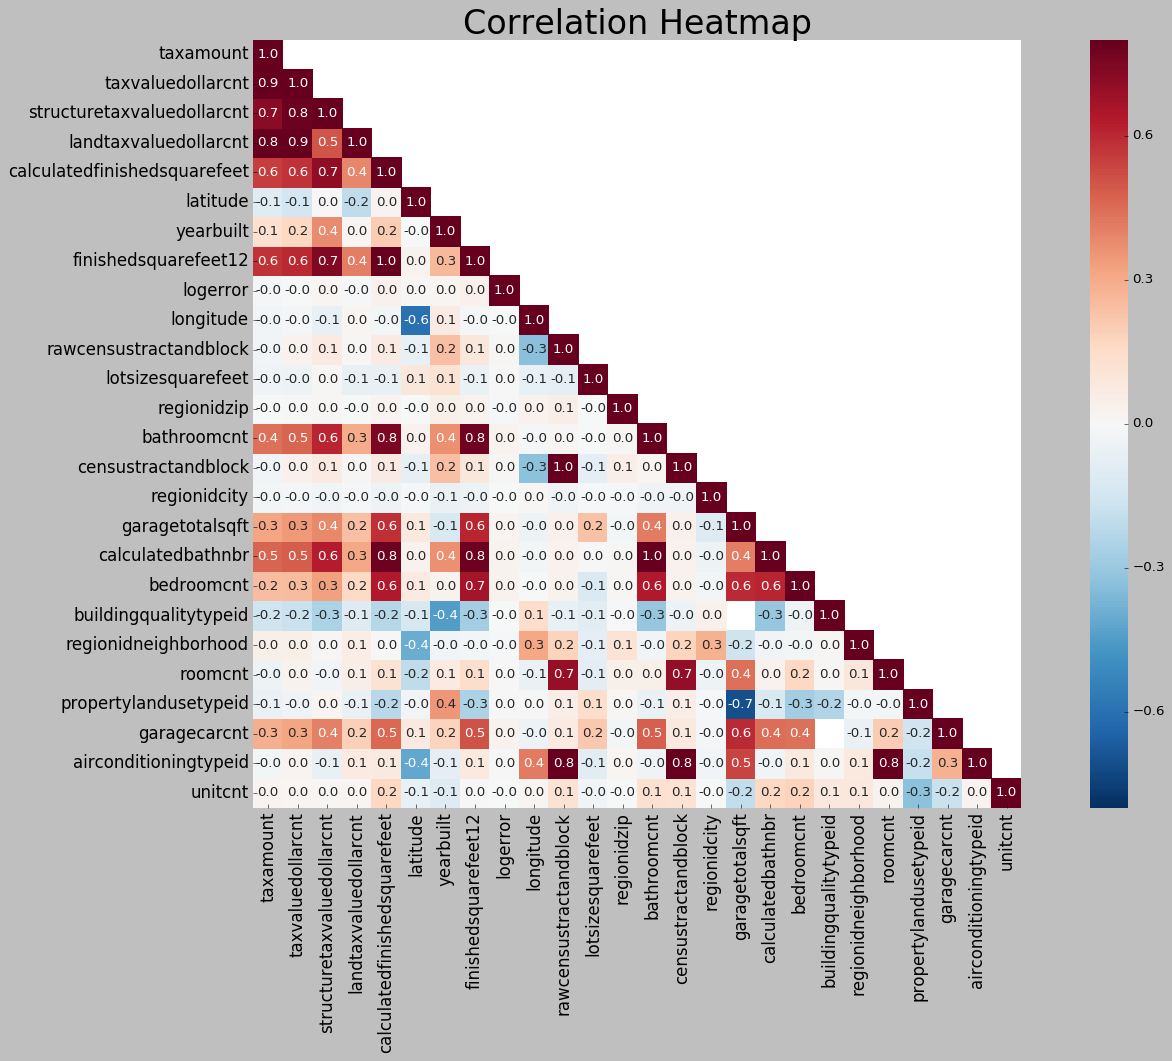

In [27]:
topFeatures = features["features"].tolist()[:28]
corrMatt = mor[topFeatures].corr()
corrFiltered = corrMatt[corrMatt['taxvaluedollarcnt']<.6]
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(22,12)
ax.set_title('Correlation Heatmap',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True, annot=True, fmt='.1f')

In [32]:
corrFiltered1 = corrFiltered.index.tolist()
corrFiltered.columns
#corrFiltered = corrFiltered.sort_values(ascending=False).reset_index()

Index(['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'latitude',
       'yearbuilt', 'finishedsquarefeet12', 'logerror', 'longitude',
       'rawcensustractandblock', 'lotsizesquarefeet', 'regionidzip',
       'bathroomcnt', 'censustractandblock', 'regionidcity', 'garagetotalsqft',
       'calculatedbathnbr', 'bedroomcnt', 'buildingqualitytypeid',
       'regionidneighborhood', 'roomcnt', 'propertylandusetypeid',
       'garagecarcnt', 'airconditioningtypeid', 'unitcnt'],
      dtype='object')

In [29]:
sns.barplot(x=corrFiltered['taxvaluedollarcnt'],y=corrFiltered['index'],palette='GnBu_d')
plt.title('Top Ten Features Correlated to Home Value')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('')
plt.yticks(fontsize=15)

KeyError: 'index'

In [30]:
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'd' is not defined